In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
import decoupler as dc

sns.set_context("paper", font_scale=2) # set some nice global plotting settings.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
tissue = 'CortexHippocampus'

In [5]:
plate_palette = sns.color_palette("husl", n_colors=3)
sex_palette = ['hotpink','dodgerblue']
geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


In [7]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_processed.h5ad')



In [8]:
def stacked_barplot_proportions(adata, cluster_key, var_key, fsize=(12, 6), annotations=True, reverse_order=False, custom_order=None, custom_colors=None):
    colors = sns.color_palette("husl", n_colors=len(adata[var_key].unique()))

    # Group the data by 'cluster_key' and 'var_key', count occurrences, and calculate proportions
    grouped_data = adata.groupby([cluster_key, var_key]).size().unstack().fillna(0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    # Apply custom order if provided
    if custom_order:
        proportions = proportions.loc[custom_order]
    if custom_colors:
        colors = custom_colors

    # Reverse the order of the DataFrame if reverse_order is True
    if reverse_order:
        proportions = proportions.iloc[::-1]
        m = adata.groupby([cluster_key]).size().to_frame().iloc[::-1]
    else:
        m = adata.groupby([cluster_key]).size().to_frame()

    #sns.set_style('white')
    # Create the stacked bar plot
    ax = proportions.plot(kind='barh', color=colors, stacked=True, figsize=fsize, width=0.8, edgecolor=None)

    if annotations:
        for i, txt in enumerate(m[0]):
            ax.text(0.875, i, txt, fontsize=14, va='center', transform=ax.get_yaxis_transform())

    plt.xlim(0, 1.15)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(cluster_key)
    ax.set_title(f'{var_key} by {cluster_key}')

    if annotations:
        ax.legend(title=var_key, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

    ax.grid(False)
    
    plt.show()

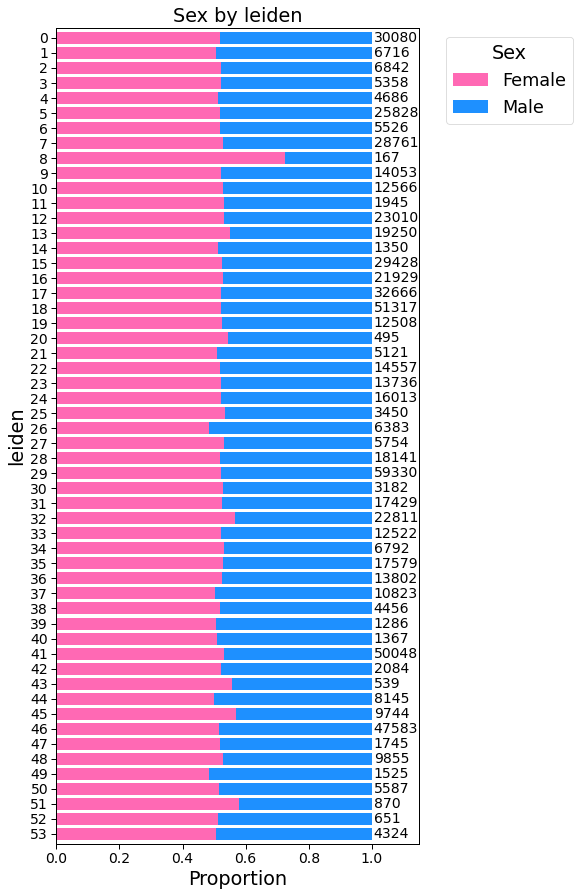

In [9]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Sex',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = sex_palette,
                            annotations = True)


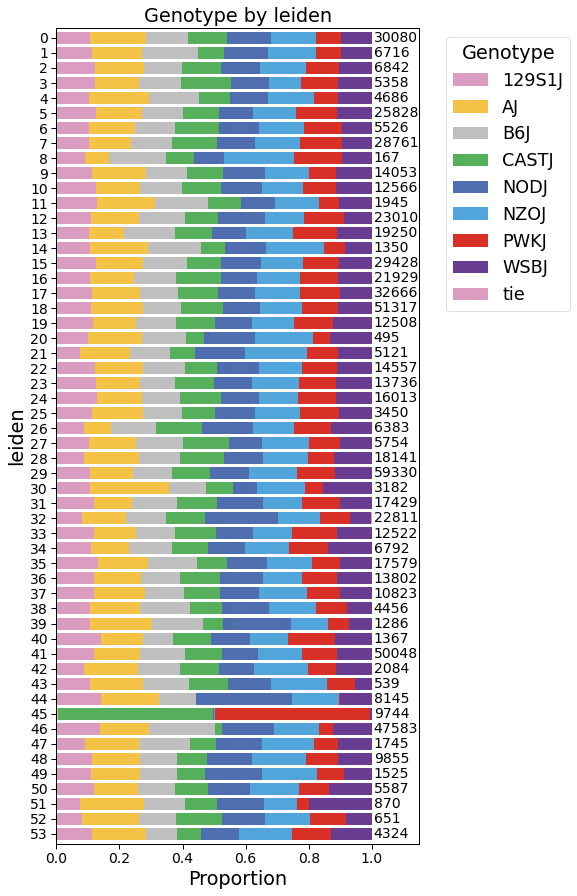

In [10]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Genotype',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = geno_palette,
                            annotations = True)


In [11]:
smol_marker_genes_dict = {
    "Endothelial": ["Flt1"],
    "Pericyte": ["Vtn"],
    "VLMC": ["Dcn",'Slc6a13','Ptgds'], 
    "ABC (type of VLMC)": ['Mgp','Slc47a1','Dapl1','Bnc2'],
    "OEC": ['Prss56'],
    "Epithelial":["Kl","Ttr","Clic6"],
    "Ependymal":["Tmem212","Dnah6"],
    "Microglia": ["Cx3cr1","Hexb","Inpp5d"],
    "Astrocyte": ["Gfap","Clu","Slc1a3"],
    "Neuron": ["Mir124a-1hg", "Snap25"],
    "Neuroblast":["Igfbpl1","Dlx2",'Cdca7','Top2a'],
    "Glutamatergic neuron": ["Slc17a7"],
    "GABAergic neuron": ["Gad1","Gad2",],
    "Medium spiny neuron" : ["Drd1","Drd2","Ppp1r1b","Adora2a"],
    "Lamp5 GABAergic": ["Lamp5"],
    "Vip GABAergic": ["Vip"],
    "Sst GABAergic": ["Sst"],
    "Pvalb GABAergic": ["Pvalb"],
    "Car3": ["Car3","Oprk1"],
    "OPC": ["Pdgfra","Cspg4"],
    "COP": ["C1ql1"],
    "MFOL": ["Mag","Mog","Mbp"],
    "MOL": ["Plp1"],
    "DG_early": ["Prox1"],
    "DG": ["Calb1"],
    "Heart": ["Ryr1","Gata4"],
    "Gastrocnemius": ["Myh4","Ttn"]
}


categories: 0, 1, 2, etc.
var_group_labels: Endothelial, Pericyte, VLMC, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


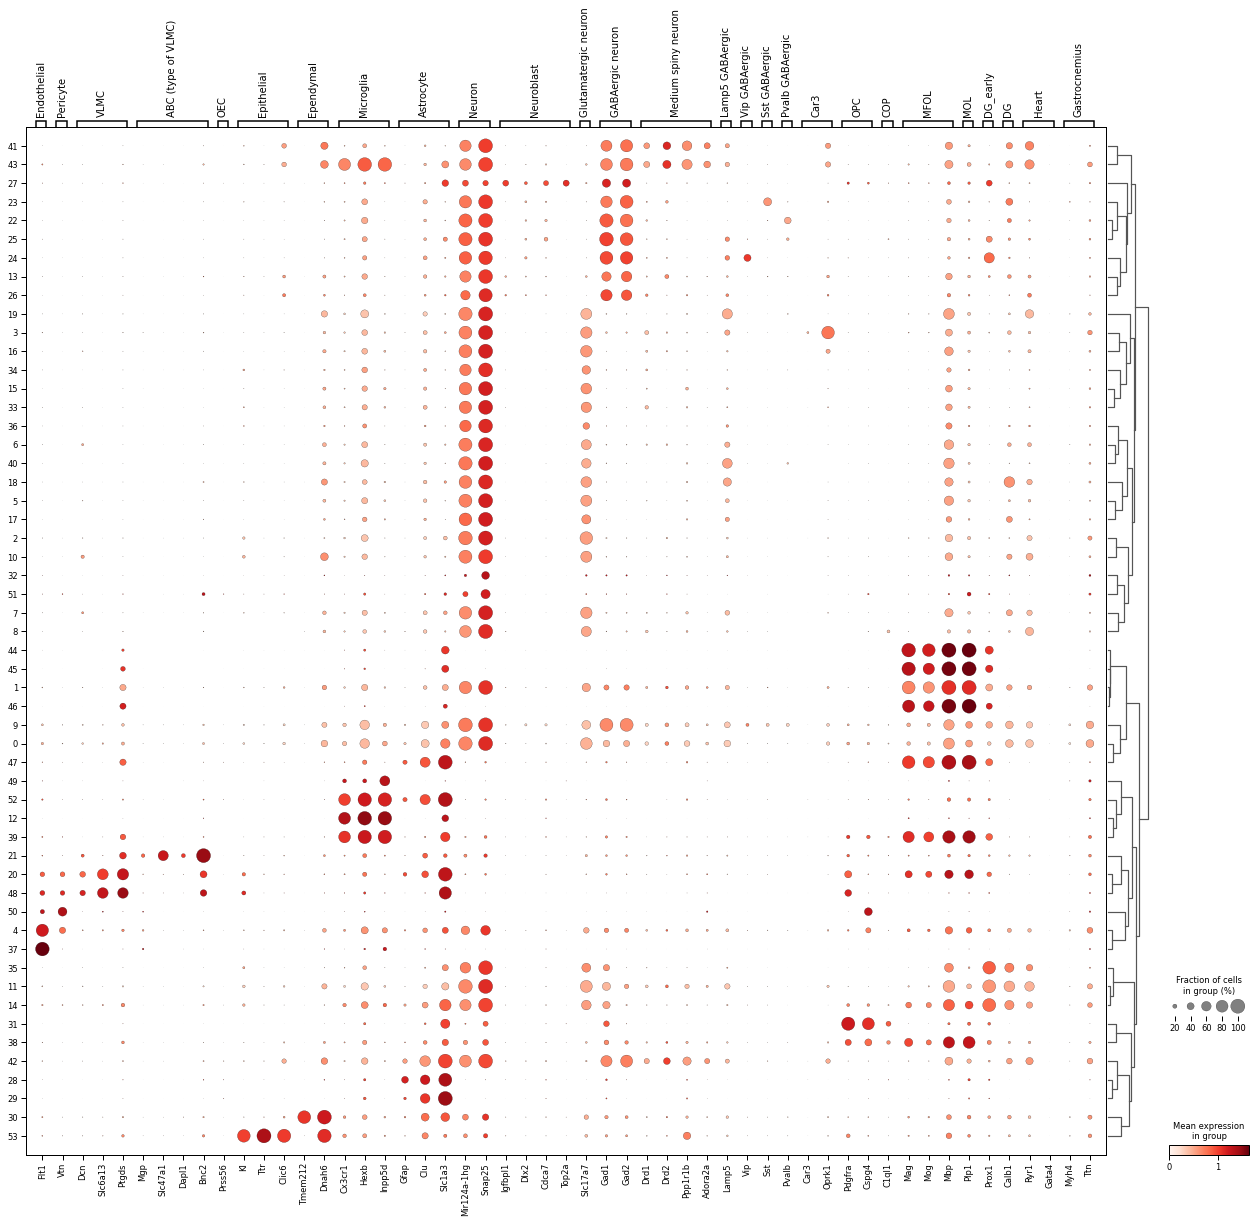

In [12]:
sc.pl.dotplot(adata, smol_marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


In [17]:
plt.rcParams['figure.figsize'] = (8, 8)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


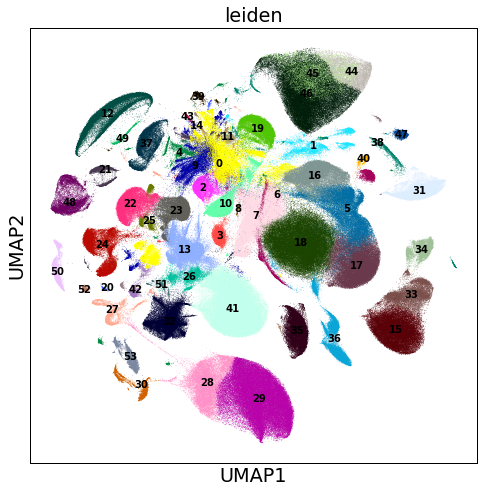

In [23]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


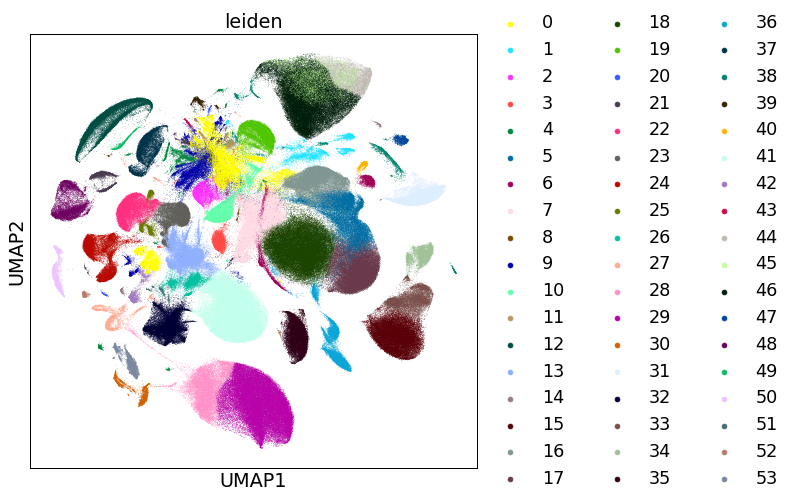

In [20]:
sc.pl.umap(adata, color=['leiden'], size=1)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


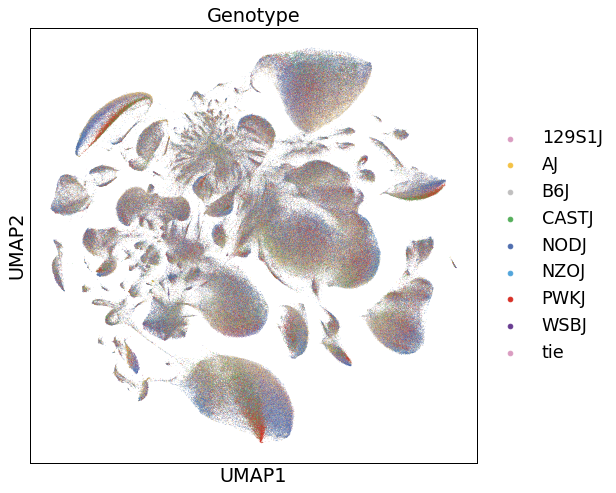

In [19]:
sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)


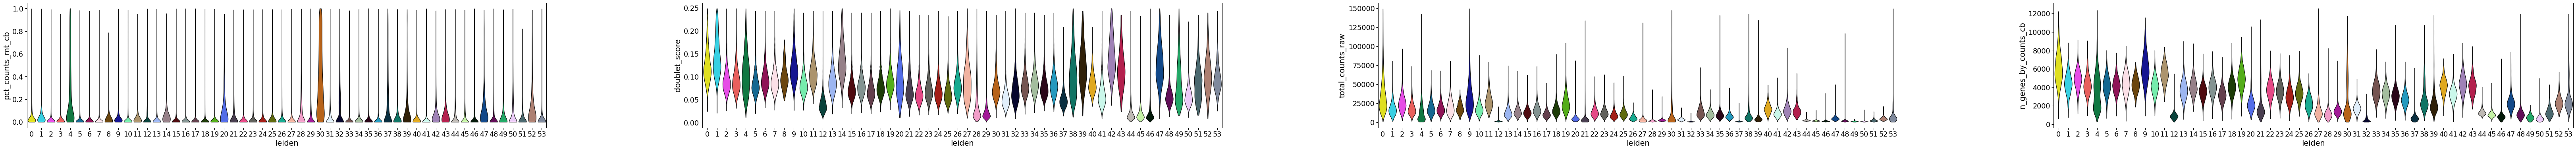

In [15]:
plt.rcParams['figure.figsize'] = (18, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "leiden", 
             jitter=0.4, multi_panel=True, size=0)

In [5]:
def plot_expression_heatmap(df, gene, title):
    # make sure we have the gene
    if gene not in df.index:
        raise ValueError(f"'{gene}' not found.")
    
    gene_data = df.loc[gene]
    
    # make an empty df for 96-well plate
    rows = list('ABCDEFGH')
    cols = list(range(1, 13))
    plate_df = pd.DataFrame(0, index=rows, columns=cols)
    
    # fill the df
    for well, expression in gene_data.items():
        row = well[0]
        col = int(well[1:])
        plate_df.at[row, col] = expression
    
    # create hmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(plate_df, annot=True, fmt='.1f', cmap='viridis', cbar=True, linewidths=0.5,
                annot_kws={"size": 10}, cbar_kws={'label': 'Gene Expression'})
    
    if title:
        plt.title(f'{gene} {title}', fontsize=16)
    else:
        plt.title(f'{gene} pseudobulk counts', fontsize=16)
        
    plt.xlabel('Column', fontsize=14)
    plt.ylabel('Row', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.show()



In [ ]:
pdata = dc.get_pseudobulk(
     adata,
     sample_col='bc1_well',
     groups_col=None,
     #layer='raw_counts',
     mode='sum',
     min_cells=1,
     min_counts=1
 )

pdata.write_h5ad("pdata_X_ctxhc.h5ad")



In [ ]:
df= pdata.to_df().transpose()

df_log2 = df.applymap(lambda x: np.log2(x + 1))


In [ ]:
plot_expression_heatmap(df_log2, 'Myh4', 'pseudobulk log2 counts')


In [ ]:
plot_expression_heatmap(df_log2, 'Slc17a7', 'pseudobulk log2 counts')


In [ ]:
pdata = dc.get_pseudobulk(
     adata,
     sample_col='bc1_well',
     groups_col=None,
     layer='raw_counts',
     mode='sum',
     min_cells=1,
     min_counts=1
 )

df_raw = pdata.to_df().transpose()

df_log2_raw = df_raw.applymap(lambda x: np.log2(x + 1))


In [ ]:
plot_expression_heatmap(df_log2_raw, 'Myh4', 'pseudobulk log2 counts')

plot_expression_heatmap(df_log2_raw, 'Slc17a7', 'pseudobulk log2 counts')


In [ ]:
pdata = dc.get_pseudobulk(
     adata,
     sample_col='bc1_well',
     groups_col=None,
     layer='cellbender_counts',
     mode='sum',
     min_cells=1,
     min_counts=1
 )

df_cb = pdata.to_df().transpose()

df_log2_cb = df_cb.applymap(lambda x: np.log2(x + 1))


In [ ]:
plot_expression_heatmap(df_log2_cb, 'Myh4', 'pseudobulk log2 counts')

plot_expression_heatmap(df_log2_cb, 'Slc17a7', 'pseudobulk log2 counts')


In [ ]:
pdata = dc.get_pseudobulk(
     adata,
     sample_col='bc1_well',
     groups_col=None,
     layer='cellbender_counts',
     mode='sum',
     min_cells=1,
     min_counts=1
 )

df_cb = pdata.to_df().transpose()

df_log2_cb = df_cb.map(lambda x: np.log2(x + 1))


# QC plotting

In [3]:
adata = sc.read_h5ad('../IGVF_analysis/cellbender_tissues/CortexHippocampus_processed.h5ad')



In [4]:
adata

AnnData object with n_obs × n_vars = 804957 × 56953
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'subpool', 'bc1_well', 'bc2_well', 'bc3_well', 'Mouse_Tissue_ID', 'plate', 'well_type', 'Tissue', 'Genotype', 'Protocol', 'Chemistry', 'Multiplexed_sample1', 'Multiplexed_sample2', 'Row', 'Column', 'SampleType', 'Sex', 'Age', 'Notes', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'Dissector', 'Tissue_weight_mg', 'Total_extracted_million', 'mult_genotype_1', 'mult_genotype_2', 'mult_genotype', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors'

In [5]:
adata = adata[adata.obs['Genotype'] != "tie",:]


In [6]:
adata

View of AnnData object with n_obs × n_vars = 804685 × 56953
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'subpool', 'bc1_well', 'bc2_well', 'bc3_well', 'Mouse_Tissue_ID', 'plate', 'well_type', 'Tissue', 'Genotype', 'Protocol', 'Chemistry', 'Multiplexed_sample1', 'Multiplexed_sample2', 'Row', 'Column', 'SampleType', 'Sex', 'Age', 'Notes', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'Dissector', 'Tissue_weight_mg', 'Total_extracted_million', 'mult_genotype_1', 'mult_genotype_2', 'mult_genotype', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'ne

In [7]:
adata.layers

Layers with keys: cellbender_counts, raw_counts

In [8]:
adata.obs.head()

background_fraction  cell_probability  \
cellID                                                                
C3_D5_F4_Subpool_8_igvf_012              0.000245          0.999955   
C2_D3_E6_Subpool_8_igvf_012              0.000178          0.999955   
C2_D5_F12_Subpool_8_igvf_012             0.000212          0.999955   
C2_A7_D9_Subpool_8_igvf_012              0.000324          0.999955   
C4_C11_D7_Subpool_8_igvf_012             0.000398          0.999955   

                                 cell_size  droplet_efficiency  \
cellID                                                           
C3_D5_F4_Subpool_8_igvf_012   55574.457031            2.499526   
C2_D3_E6_Subpool_8_igvf_012   49477.050781            2.498320   
C2_D5_F12_Subpool_8_igvf_012  39886.414062            2.486126   
C2_A7_D9_Subpool_8_igvf_012   38444.156250            2.493639   
C4_C11_D7_Subpool_8_igvf_012  32435.775391            2.480388   

                                                    bc bc1_sequence  \
cellID                                                                
C3_D5_F4_Subpool_8_igvf_012   TGAAGAGACGACTGGAACACCTTT     ACACCTTT   
C2_D3_E6_Subpool_8_igvf_012   GGAGAACACCTCCTGATCATTGCA     TCATTGCA   
C2_D5_F12_Subpool_8_igvf_012  AATCCGTCCGACTGGATCATTGCA     TCATTGCA   
C2_A7_D9_Subpool_8_igvf_012   CTGGCATACAGATCTGTCATTGCA     TCATTGCA   
C4_C11_D7_Subpool_8_igvf_012  CTCAATGACATACCAAAATTTCTC     AATTTCTC   

                             bc2_sequence bc3_sequence    subpool bc1_well  \
cellID                                                                       
C3_D5_F4_Subpool_8_igvf_012      CGACTGGA     TGAAGAGA  Subpool_8       C3   
C2_D3_E6_Subpool_8_igvf_012      CCTCCTGA     GGAGAACA  Subpool_8       C2   
C2_D5_F12_Subpool_8_igvf_012     CGACTGGA     AATCCGTC  Subpool_8       C2   
C2_A7_D9_Subpool_8_igvf_012      CAGATCTG     CTGGCATA  Subpool_8       C2   
C4_C11_D7_Subpool_8_igvf_012     CATACCAA     CTCAATGA  Subpool_8       C4   

                              ... mult_genotype doublet_score  \
cellID                        ...                               
C3_D5_F4_Subpool_8_igvf_012   ...            NA      0.086538   
C2_D3_E6_Subpool_8_igvf_012   ...            NA      0.086538   
C2_D5_F12_Subpool_8_igvf_012  ...            NA      0.149254   
C2_A7_D9_Subpool_8_igvf_012   ...            NA      0.111111   
C4_C11_D7_Subpool_8_igvf_012  ...            NA      0.086538   

                             predicted_doublet n_genes_by_counts total_counts  \
cellID                                                                          
C3_D5_F4_Subpool_8_igvf_012              False             10472     139020.0   
C2_D3_E6_Subpool_8_igvf_012              False             10146     123660.0   
C2_D5_F12_Subpool_8_igvf_012              True              9533      99139.0   
C2_A7_D9_Subpool_8_igvf_012               True              9559      95819.0   
C4_C11_D7_Subpool_8_igvf_012             False              8518      80319.0   

                             total_counts_mt pct_counts_mt  n_counts n_genes  \
cellID                                                                         
C3_D5_F4_Subpool_8_igvf_012             12.0      0.008632  139020.0   10472   
C2_D3_E6_Subpool_8_igvf_012              9.0      0.007278  123660.0   10146   
C2_D5_F12_Subpool_8_igvf_012            16.0      0.016139   99139.0    9533   
C2_A7_D9_Subpool_8_igvf_012              6.0      0.006262   95819.0    9559   
C4_C11_D7_Subpool_8_igvf_012            35.0      0.043576   80319.0    8518   

                             leiden  
cellID                               
C3_D5_F4_Subpool_8_igvf_012       7  
C2_D3_E6_Subpool_8_igvf_012       7  
C2_D5_F12_Subpool_8_igvf_012      7  
C2_A7_D9_Subpool_8_igvf_012      31  
C4_C11_D7_Subpool_8_igvf_012     29  

[5 rows x 48 columns]

In [9]:
adata.var.head()

gene_id      gene_name     mt  n_cells_by_counts  \
gene_name                                                                      
4933401J01Rik  ENSMUSG00000102693.2  4933401J01Rik  False                 22   
Gm26206        ENSMUSG00000064842.3        Gm26206  False                  0   
Xkr4           ENSMUSG00000051951.6           Xkr4  False             688039   
Gm18956        ENSMUSG00000102851.2        Gm18956  False                424   
Gm37180        ENSMUSG00000103377.2        Gm37180  False             145504   

               mean_counts  pct_dropout_by_counts  total_counts  \
gene_name                                                         
4933401J01Rik     0.000023              99.997757          23.0   
Gm26206           0.000000             100.000000           0.0   
Xkr4             12.777084              29.838188    12529797.0   
Gm18956           0.000442              99.956763         433.0   
Gm37180           0.203462              85.162434      199524.0   

               highly_variable         means  dispersions  dispersions_norm  
gene_name                                                                    
4933401J01Rik            False  1.510967e-05    -0.399518         -1.844991  
Gm26206                  False  1.000000e-12          NaN               NaN  
Xkr4                     False  2.506381e+00     2.345885         -0.573957  
Gm18956                  False  4.196232e-04     1.347287          0.210929  
Gm37180                  False  1.664731e-01     1.185040          0.019971

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from natsort import natsorted

def plot_knee(adata, category_column='subpool'):
    unique_categories = natsorted(adata.obs[category_column].unique())

    fig, ax = plt.subplots(figsize=(10, 7))

    for category in unique_categories:
        # Subset the data for each sublibrary
        subset = adata[adata.obs[category_column] == category]

        # Calculate knee and num_cells for raw_counts
        knee_raw = np.sort(np.array(subset.layers['raw_counts'].sum(axis=1)).flatten())[::-1]
        cell_set_raw = np.arange(len(knee_raw))

        # Plot the knee for raw_counts
        ax.loglog(cell_set_raw, knee_raw, linewidth=3 ,label=f"{category} (raw)")

        # Calculate knee and num_cells for cellbender_counts
        knee_cellbender = np.sort(np.array(subset.layers['cellbender_counts'].sum(axis=1)).flatten())[::-1]
        cell_set_cellbender = np.arange(len(knee_cellbender))

        # Plot the knee for cellbender_counts
        ax.loglog(cell_set_cellbender, knee_cellbender, linewidth=3, label=f"{category} (cellbender)")

    # Plot the threshold line
    ax.axhline(y=500, linewidth=3, color="k", linestyle='--')

    # Set labels and title
    ax.set_ylabel("UMI Counts", fontsize=18)
    ax.set_xlabel("Set of Barcodes", fontsize=18)
    ax.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Customize tick parameters
    ax.tick_params(axis='both', which='major', labelsize=16)

    # Enable grid
    plt.grid(True, which="both")

    plt.show()



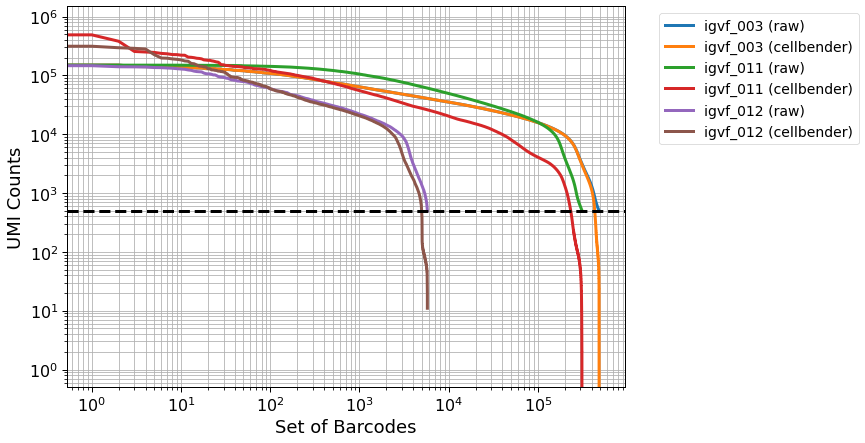

In [10]:
plot_knee(adata, category_column = "plate")

plt.show()

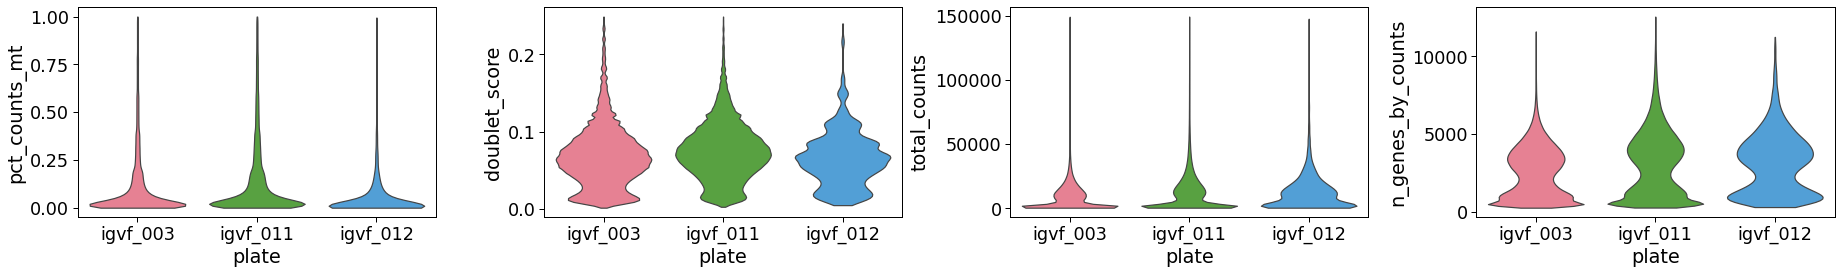

In [12]:
sc.pl.violin(adata, ['pct_counts_mt', 'doublet_score', 'total_counts', 'n_genes_by_counts'],
             groupby = "plate", palette = plate_palette,
             jitter=0.4, multi_panel=True, size=0)

In [13]:
print(adata.obs['Genotype'].value_counts())


Genotype
NODJ      118820
AJ        114707
NZOJ      110983
B6J       104598
CASTJ      95206
PWKJ       91670
129S1J     86773
WSBJ       81928
tie          272
Name: count, dtype: int64


In [10]:
def plot_expression_heatmap(df, gene, title):
    # make sure we have the gene
    if gene not in df.index:
        raise ValueError(f"'{gene}' not found.")
    
    gene_data = df.loc[gene]
    
    # make an empty df for 96-well plate
    rows = list('ABCDEFGH')
    cols = list(range(1, 13))
    plate_df = pd.DataFrame(0, index=rows, columns=cols)
    
    # fill the df
    for well, expression in gene_data.items():
        row = well[0]
        col = int(well[1:])
        plate_df.at[row, col] = expression
    
    # create hmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(plate_df, annot=True, fmt='.1f', cmap='viridis', cbar=True, linewidths=0.5,
                annot_kws={"size": 10}, cbar_kws={'label': 'Gene Expression'})
    
    if title:
        plt.title(f'{gene} {title}', fontsize=16)
    else:
        plt.title(f'{gene} pseudobulk counts', fontsize=16)
        
    plt.xlabel('Column', fontsize=14)
    plt.ylabel('Row', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.show()



# Check clustering
Plate, sex, genotype

In [8]:
def stacked_barplot_proportions(adata, cluster_key, var_key, fsize=(12, 6), annotations=True, reverse_order=False, custom_order=None, custom_colors=None):
    colors = sns.color_palette("husl", n_colors=len(adata[var_key].unique()))

    # Group the data by 'cluster_key' and 'var_key', count occurrences, and calculate proportions
    grouped_data = adata.groupby([cluster_key, var_key]).size().unstack().fillna(0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    # Apply custom order if provided
    if custom_order:
        proportions = proportions.loc[custom_order]
    if custom_colors:
        colors = custom_colors

    # Reverse the order of the DataFrame if reverse_order is True
    if reverse_order:
        proportions = proportions.iloc[::-1]
        m = adata.groupby([cluster_key]).size().to_frame().iloc[::-1]
    else:
        m = adata.groupby([cluster_key]).size().to_frame()

    #sns.set_style('white')
    # Create the stacked bar plot
    ax = proportions.plot(kind='barh', color=colors, stacked=True, figsize=fsize, width=0.8, edgecolor=None)

    if annotations:
        for i, txt in enumerate(m[0]):
            ax.text(0.875, i, txt, fontsize=14, va='center', transform=ax.get_yaxis_transform())

    plt.xlim(0, 1.15)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(cluster_key)
    ax.set_title(f'{var_key} by {cluster_key}')

    if annotations:
        ax.legend(title=var_key, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

    ax.grid(False)
    
    plt.show()

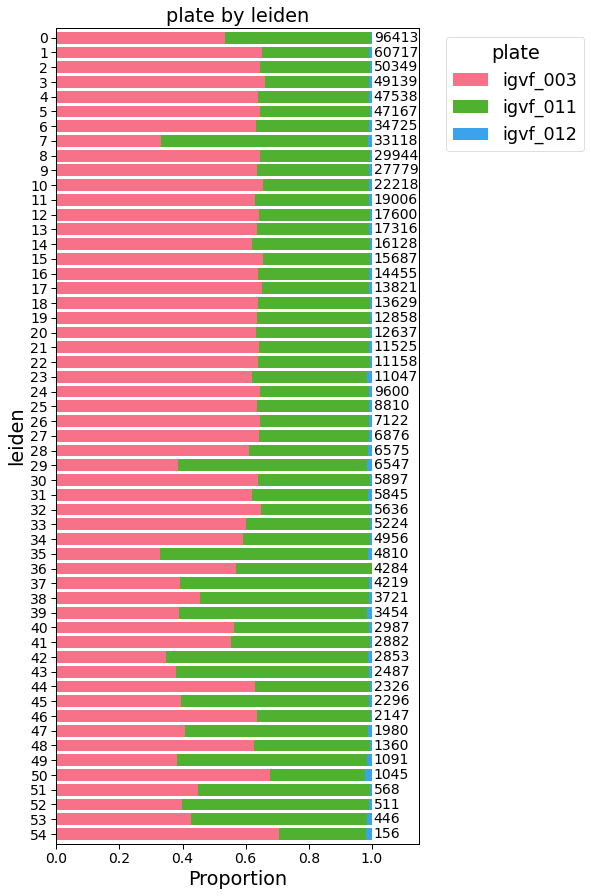

In [14]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'plate',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            annotations = True)


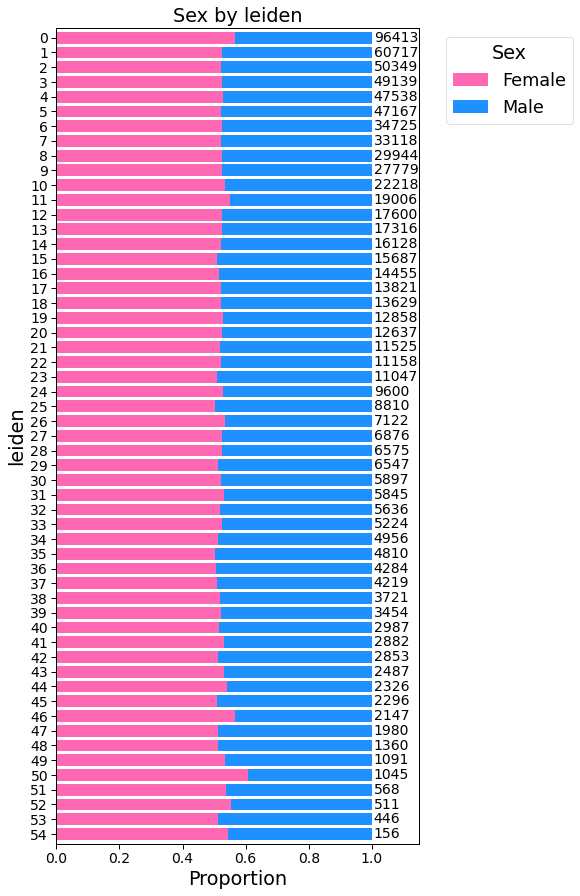

In [18]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Sex',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = sex_palette,
                            annotations = True)


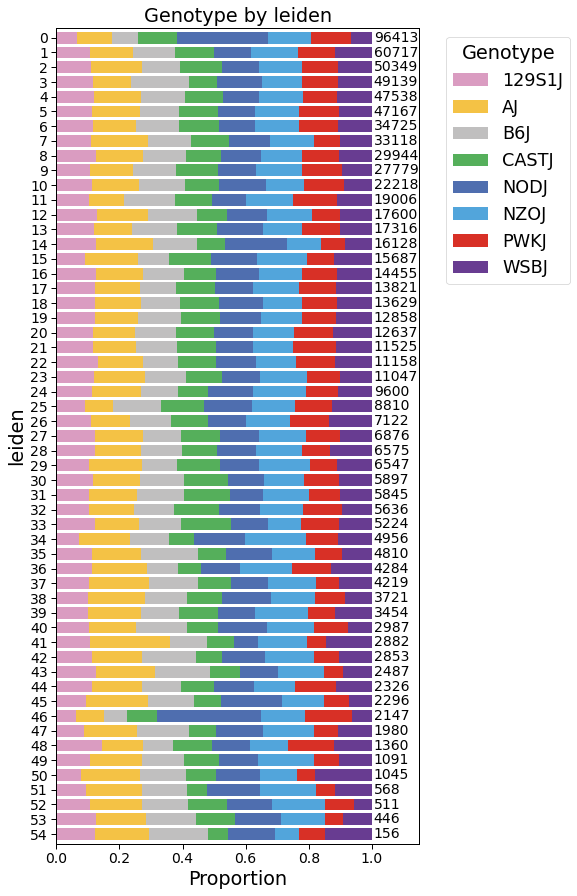

In [19]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Genotype',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = geno_palette,
                            annotations = True)


In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)

sc.pl.umap(adata, color=['leiden'], size=1, legend_loc = 'on data')

sc.pl.umap(adata, color=['plate'], size = 0.8, palette = plate_palette)

sc.pl.umap(adata, color=['Sex'], size = 0.8, palette = sex_palette)

sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)



/opt/apps/python/3.8.0/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [ ]:
sc.pl.umap(adata, color=['doublet_score'], size = 0.8)


In [ ]:
sc.pl.violin(adata, ['pct_counts_mt', 'doublet_score', 'total_counts', 'n_genes_by_counts'],
             groupby = "leiden", 
             jitter=0.4, multi_panel=True, size=0)

# Check marker gene expression

In [16]:
markers_df = pd.read_csv("IGVF_curated_markers.csv")
markers_df = markers_df[markers_df['Tissue'] == 'CortexHippocampus']
marker_genes_dict = {}

for index, row in markers_df.iterrows():
    gene = row['Gene']
    subtype = row['Subtype']

    if subtype not in marker_genes_dict:
        marker_genes_dict[subtype] = [gene]
    else:
        marker_genes_dict[subtype].append(gene)

categories: 0, 1, 2, etc.
var_group_labels: Astrocyte, CA1, CA2, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


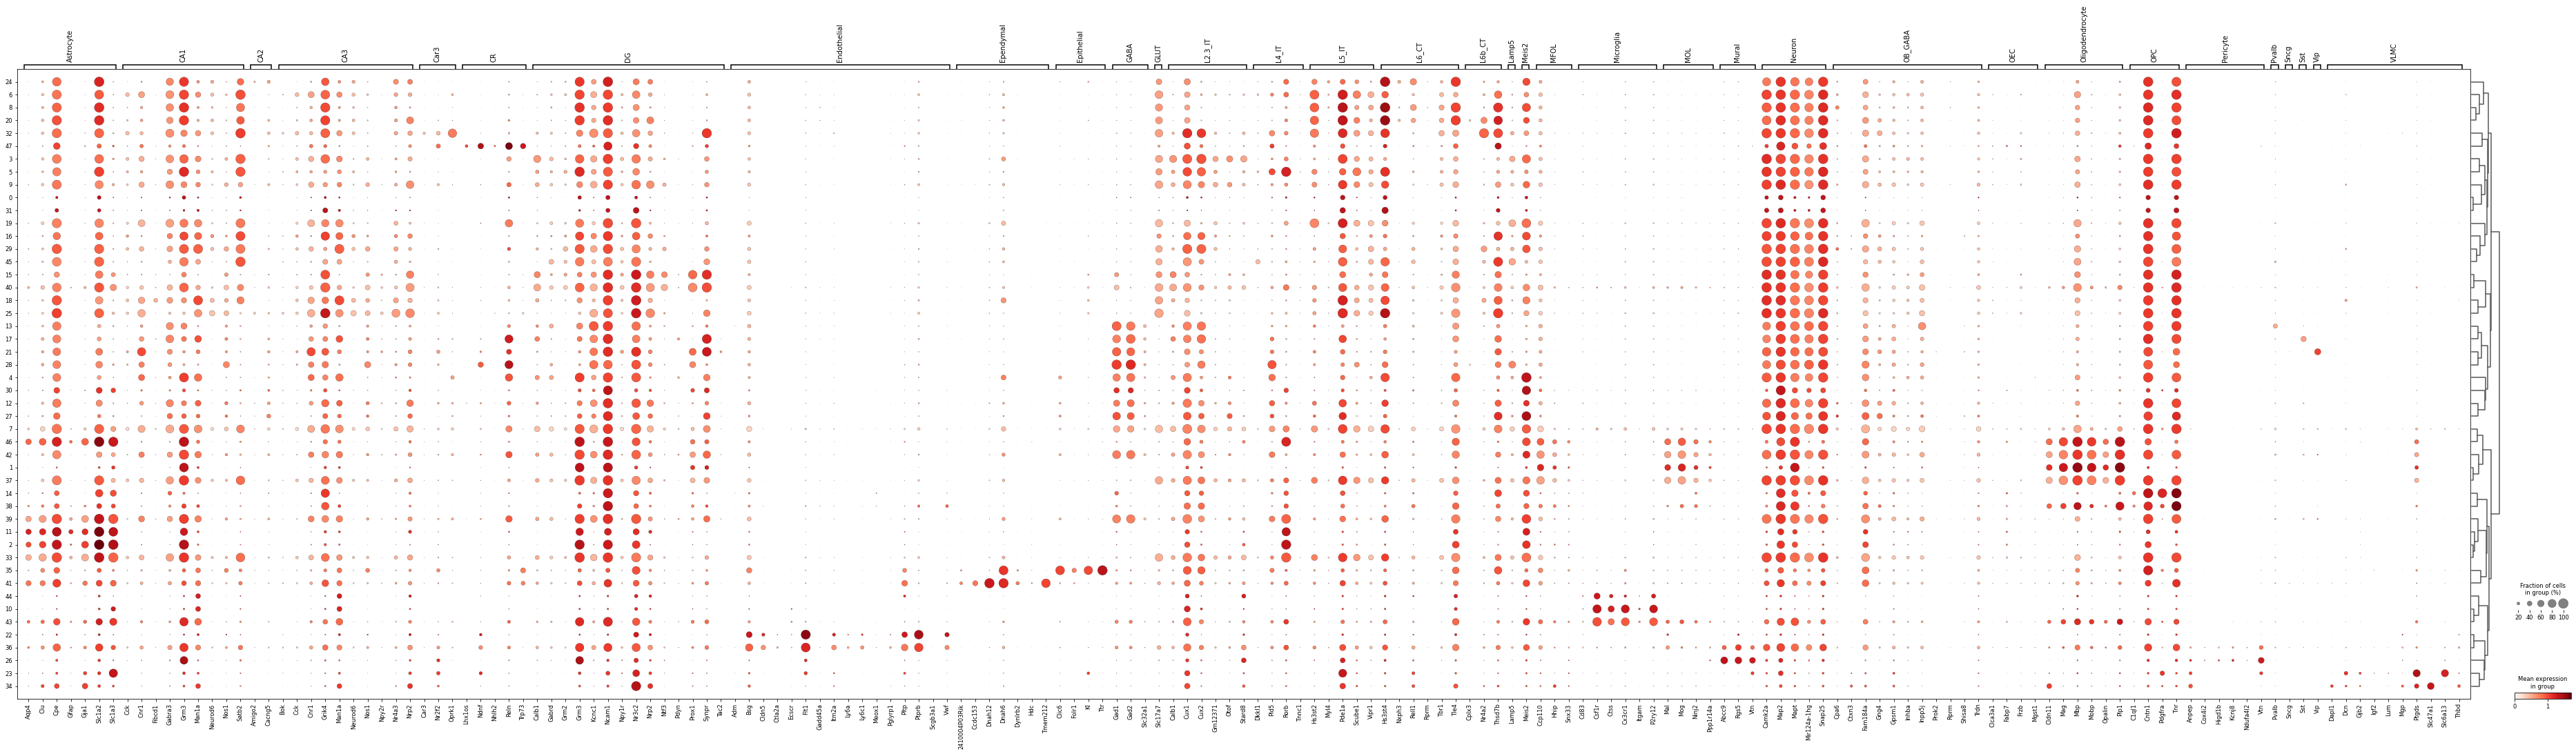

In [17]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


In [18]:
smol_marker_genes_dict = {
    "Endothelial": ["Flt1"],
    "Pericyte": ["Vtn"],
    "Fibroblast": ["Bnc2","Fbxl7"],
    "VLMC": ["Dcn"],
    "Epithelial":["Kl","Ttr","Clic6"],
    "Ependymal":["Tmem212","Dnah6"],
    "Microglia": ["Cx3cr1"],
    "Astrocyte": ["Gfap","Clu"],
    "Glutamatergic": ["Slc17a7"],
    "GABAergic": ["Gad1","Gad2",],
    "CR": ["Reln"],
    "Meis2": ["Meis2"],
    "Lamp5": ["Lamp5"],
    "Vip": ["Vip"],
    "Sst": ["Sst"],
    "Pvalb": ["Pvalb"],
    "Car3": ["Car3","Oprk1"],
    "DG_early": ["Prox1"],
    "DG": ["Calb1"],
    "L2/3": ['Otof','Calb1'],
    "L4": ["Pld5"],
    "L6": ["Scube1","Hs3st2","Pde1a"],
    "OPC": ["Pdgfra"],
    "COP": ["C1ql1"],
    "MFOL": ["Mag","Mog"],
    "MOL": ["Plp1"],
    "Heart": ["Ryr1","Gata4"],
    "Gastrocnemius": ["Myh4","Ttn"]
}



categories: 0, 1, 2, etc.
var_group_labels: Endothelial, Pericyte, Fibroblast, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


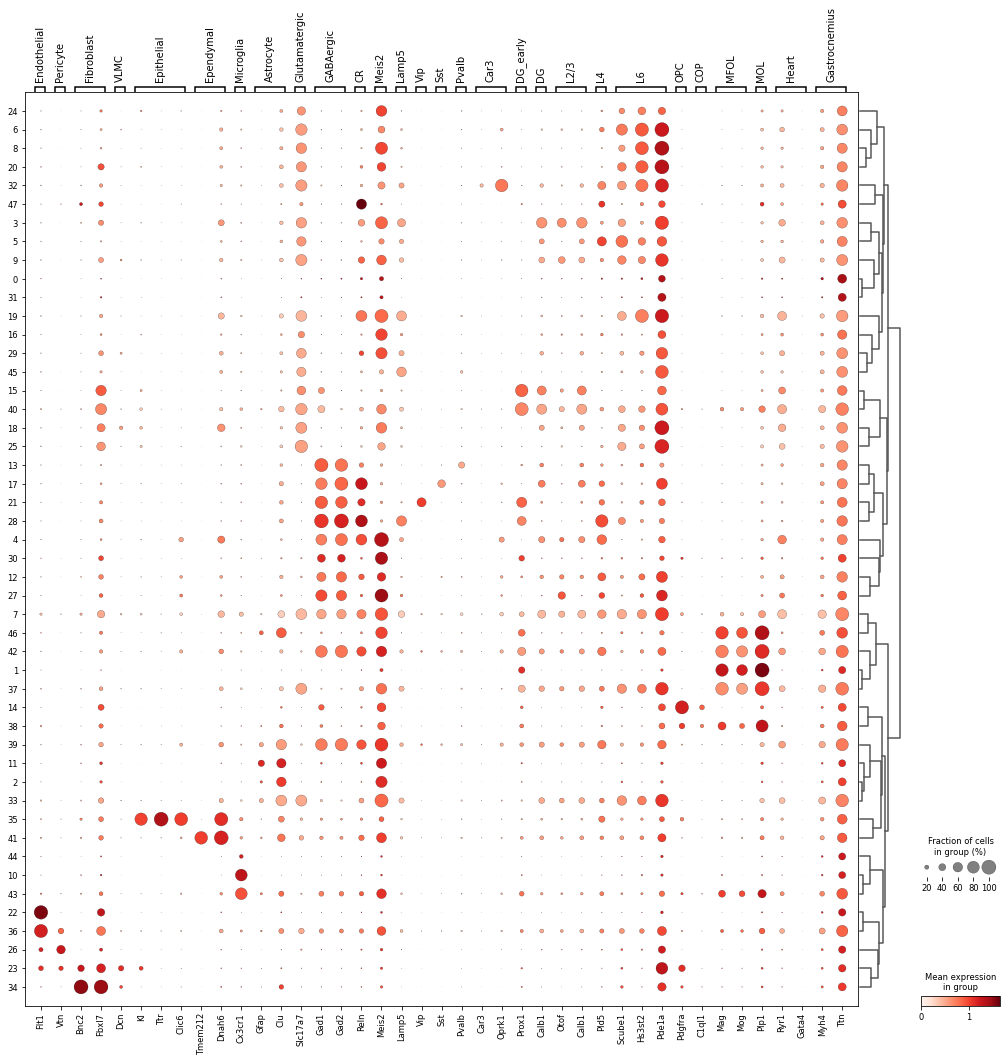

In [19]:
sc.pl.dotplot(adata, smol_marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


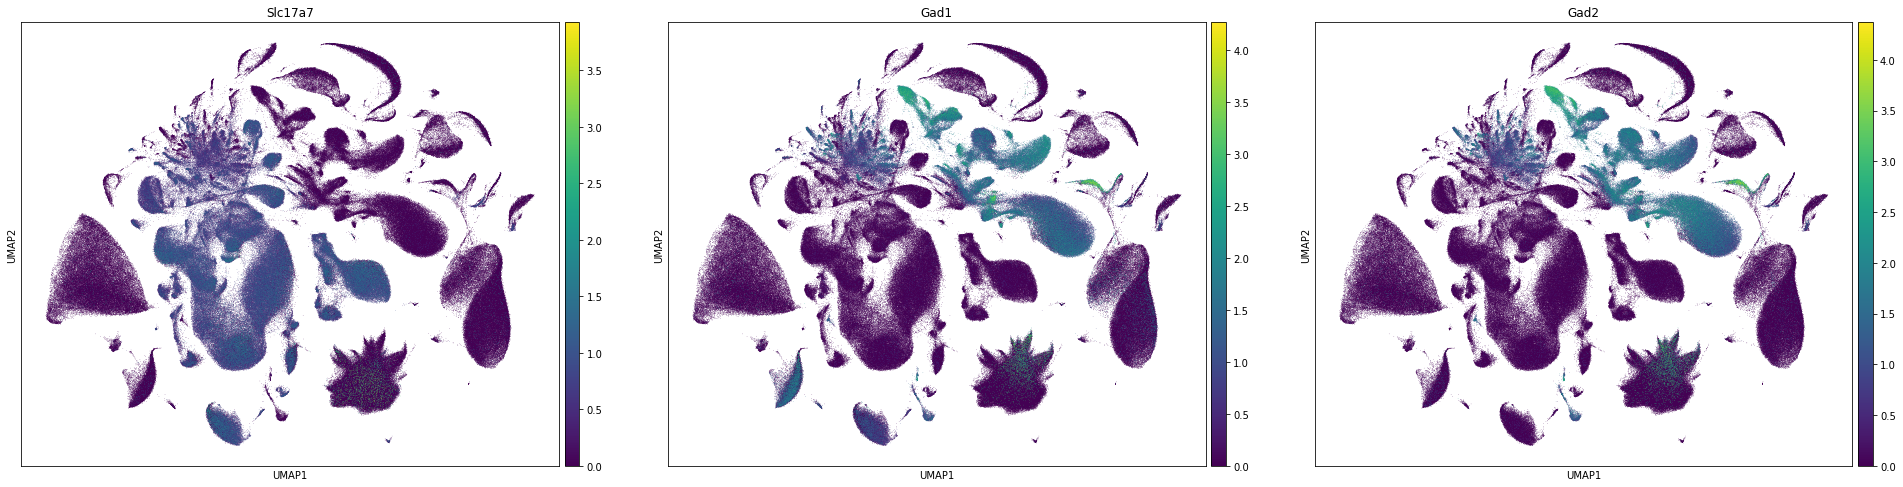

In [20]:
plt.rcParams['figure.figsize'] = (10, 8)

sc.pl.umap(adata, color=['Slc17a7','Gad1','Gad2'], size=1)



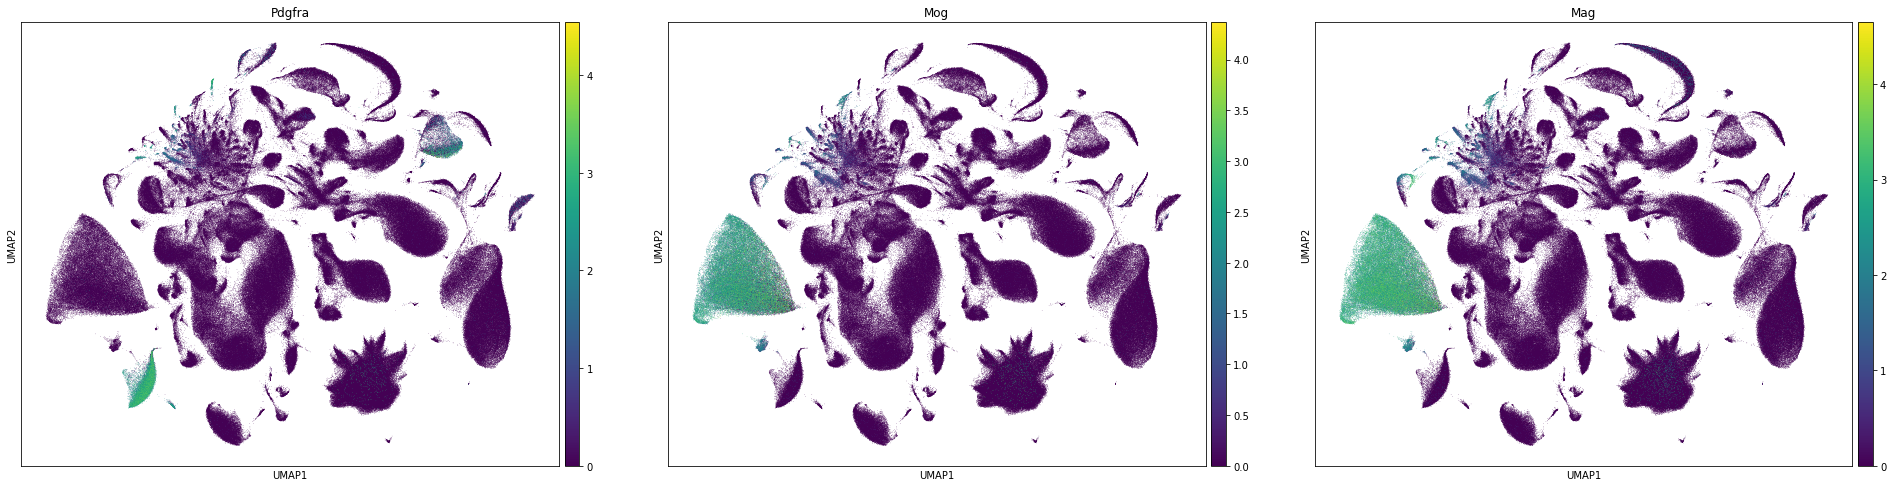

In [21]:
sc.pl.umap(adata, color=['Pdgfra','Mog','Mag'], size=1)

# Label transfer from ENC4 Parse 2mo data
Combine cortex and hippocampus 

## Prepare reference

In [ ]:
ctx_data = sc.read_mtx("/dfs5/bio/erebboah/snrna/cortex/seurat/cortex_all_genes.mtx")
  
ctx_obs = pd.read_csv("/dfs5/bio/erebboah/snrna/cortex/seurat/cortex_Parse_10x_integrated_metadata.csv")
ctx_obs = ctx_obs[['cellID', 'tissue', 'technology','timepoint','celltypes', 'subtypes']]

ctx_var = pd.read_csv("/dfs5/bio/erebboah/snrna/cortex/seurat/cortex_seurat_genes.csv", index_col = 0)
ctx_var.columns = ["gene_name"]

X = ctx_data.X
X = X.T
ctx_ref = anndata.AnnData(X=X, obs=ctx_obs, var=ctx_var)
ctx_ref.obs.index = ctx_obs["cellID"]
ctx_ref.var_names  = ctx_ref.var['gene_name']


In [ ]:
hc_data = sc.read_mtx("/dfs5/bio/erebboah/snrna/hippocampus/seurat/hippocampus_all_genes.mtx")
  
hc_obs = pd.read_csv("/dfs5/bio/erebboah/snrna/hippocampus/seurat/hippocampus_Parse_10x_integrated_metadata.csv")
hc_obs = hc_obs[['cellID', 'tissue', 'technology','timepoint','celltypes', 'subtypes']]

hc_var = pd.read_csv("/dfs5/bio/erebboah/snrna/hippocampus/seurat/hippocampus_seurat_genes.csv", index_col = 0)
hc_var.columns = ["gene_name"]

X = hc_data.X
X = X.T
hc_ref = anndata.AnnData(X=X, obs=hc_obs, var=hc_var)
hc_ref.obs.index = hc_obs["cellID"]
hc_ref.var_names  = hc_ref.var['gene_name']


In [ ]:
ref_data = anndata.concat([ctx_ref,hc_ref], merge = "same")

In [ ]:
ref_data = ref_data[ref_data.obs['technology'] == "Parse",:]
ref_data = ref_data[ref_data.obs['timepoint'] == "PNM_02",:]


In [ ]:
ref_data.layers["raw_counts"] = ref_data.X.copy()


In [ ]:
ref_data.write_h5ad("../IGVF_analysis/external_ref/enc4_parse_pnm02_cortexhippocampus.h5ad")
                    
                    

## Merge and preprocess

In [ ]:
ref_data = sc.read("../IGVF_analysis/external_ref/enc4_parse_pnm02_cortexhippocampus.h5ad")


In [ ]:
adata.var_names  = adata.var['gene_name']


In [ ]:
adata.obs['batch'] = 'query'
ref_data.obs['batch'] = 'reference'

In [ ]:
adata = adata.concatenate(ref_data)


In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata


In [ ]:
sc.pp.highly_variable_genes(adata, flavor = 'seurat_v3', n_top_genes=2000,
                            layer = "raw_counts", batch_key="batch", subset = True)



# Run scvi

In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer = 'raw_counts', batch_key='batch')
vae = scvi.model.SCVI(adata)
vae.train()


In [ ]:
adata.obs['subtypes'] = adata.obs['subtypes'].cat.add_categories('Unknown')
adata.obs = adata.obs.fillna(value = {'subtypes': 'Unknown'})



In [ ]:
lvae = scvi.model.SCANVI.from_scvi_model(vae, adata = adata, unlabeled_category = 'Unknown',
                                        labels_key = 'subtypes')

lvae.train(max_epochs=20, n_samples_per_label=100)

adata.obs['predictions'] = lvae.predict(adata)


In [ ]:
adata.obs['cell_barcodes'] = adata.obs.index.map(lambda x: x[:-2])

cell_mapper = dict(zip(adata.obs.cell_barcodes, adata.obs.predictions))

## Map back onto original adata

In [ ]:
adata = sc.read("../IGVF_analysis/tissue_processed_500umi/CortexHippocampus_processed.h5ad")
adata = adata[adata.obs['Genotype'] != "tie",:]


In [ ]:
adata.obs['predictions'] = adata.obs.index.map(cell_mapper)


In [ ]:
adata.write_h5ad('../IGVF_analysis/annotated_tissues/CortexHippocampus_filtered.h5ad')


In [3]:
adata = sc.read("../IGVF_analysis/annotated_tissues/CortexHippocampus_filtered.h5ad")


In [8]:
adata.var_names  = adata.var['gene_name']


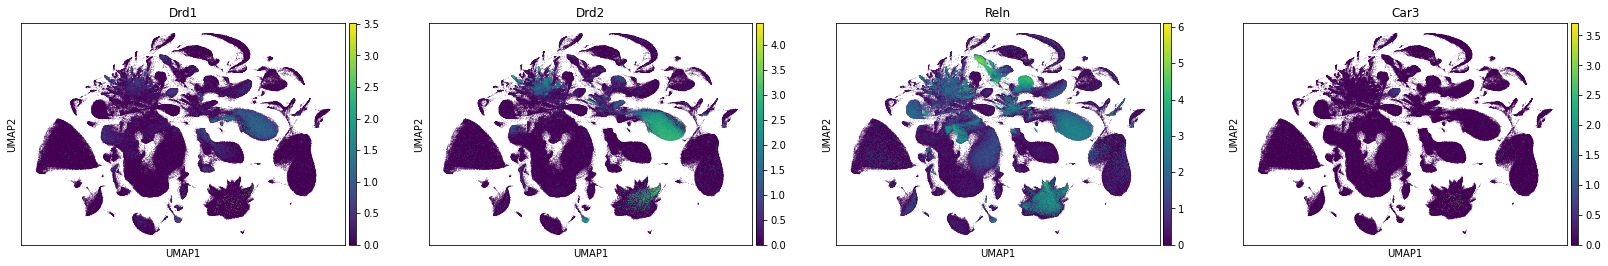

In [12]:
sc.pl.umap(adata, color=['Drd1','Drd2','Reln','Car3'], size=1)


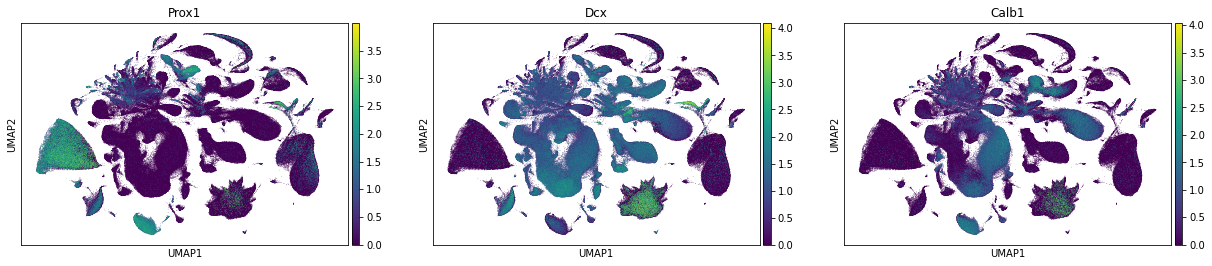

In [15]:
sc.pl.umap(adata, color=['Prox1','Dcx','Calb1'], size=1)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


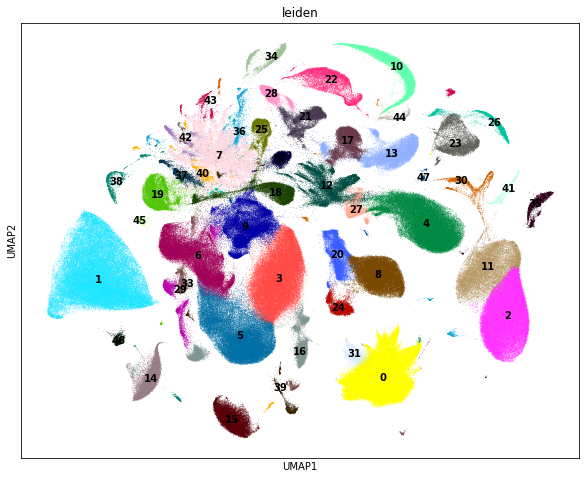

In [13]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


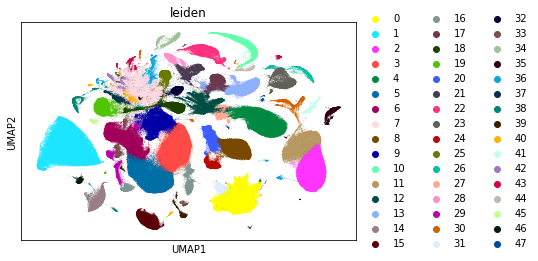

In [11]:
sc.pl.umap(adata, color=['leiden'], size=1)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


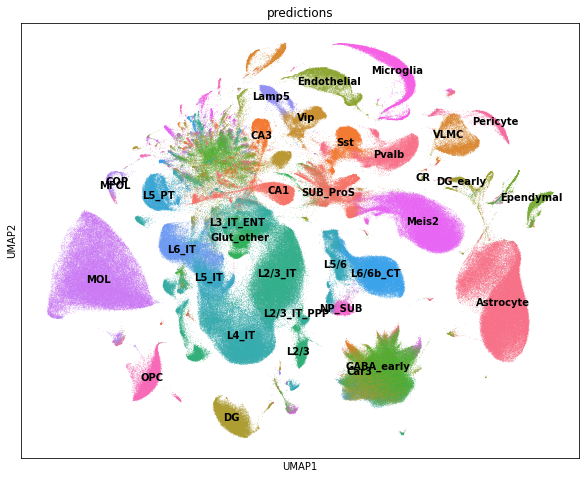

In [11]:
color_palette = sns.color_palette("husl", n_colors=30)

plt.rcParams['figure.figsize'] = (10, 8)


sc.pl.umap(adata, color=['predictions'], size=1, legend_loc = 'on data',palette=color_palette)



/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


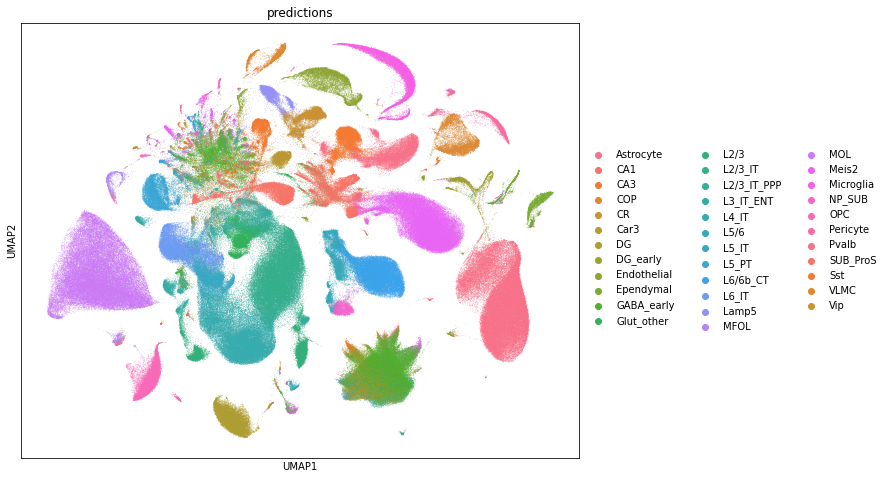

In [12]:
sc.pl.umap(adata, color=['predictions'], size=1, palette=color_palette)


In [7]:
obs = adata.obs

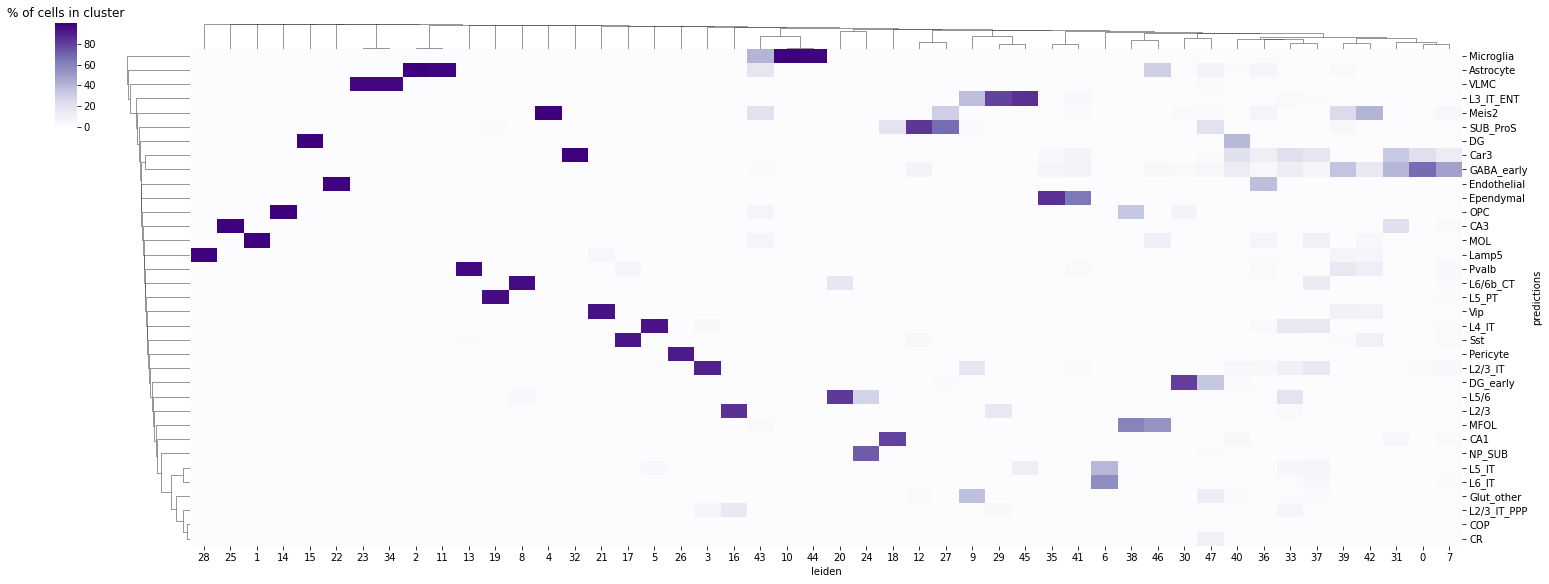

In [8]:
confusion_matrix_df = pd.crosstab(obs['leiden'], obs['predictions'])
confusion_matrix_df_percentage = confusion_matrix_df.div(confusion_matrix_df.sum(axis=1), axis=0) * 100
confusion_matrix_df_percentage_transposed = confusion_matrix_df_percentage.transpose()

sns.clustermap(confusion_matrix_df_percentage_transposed, 
               cmap='Purples',
               dendrogram_ratio=0.05,
               cbar_pos=(-0.04, 0.8, 0.015, 0.18),
               cbar=True,
               method='average', 
               metric='euclidean', 
               figsize=(20, 8), 
               col_cluster=True, 
               row_cluster=True)
plt.title('% of cells in cluster')
plt.show()

# Assign celltypes to clusters

In [12]:
annots = pd.read_csv("CortexHippocampus_annotations.csv")
annots['leiden'] = annots['leiden'].astype(str)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_celltype'].to_dict()
adata.obs['general_celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_CL_ID'].to_dict()
adata.obs['general_CL_ID'] = adata.obs['leiden'].map(annotation_dict)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['celltype'].to_dict()
adata.obs['celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['CL_ID'].to_dict()
adata.obs['CL_ID'] = adata.obs['leiden'].map(annotation_dict)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['subtype'].to_dict()
adata.obs['subtype'] = adata.obs['leiden'].map(annotation_dict)



/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


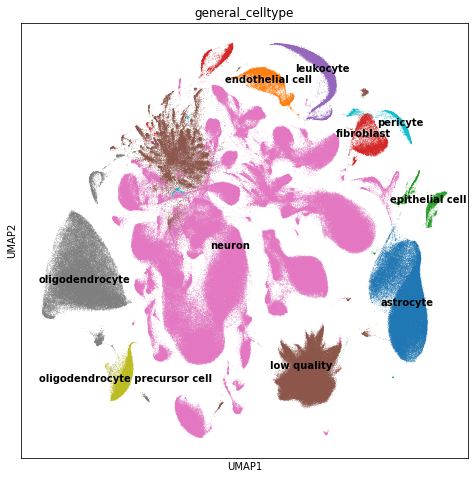

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


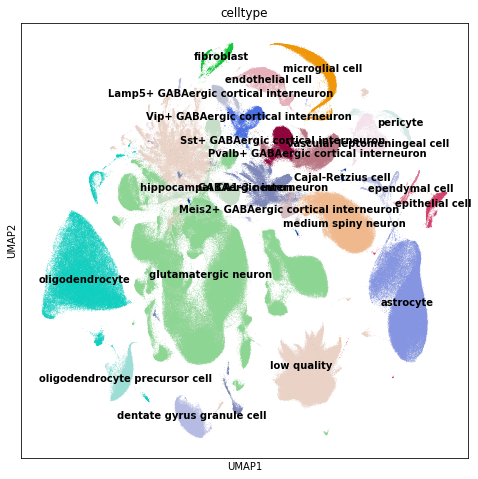

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


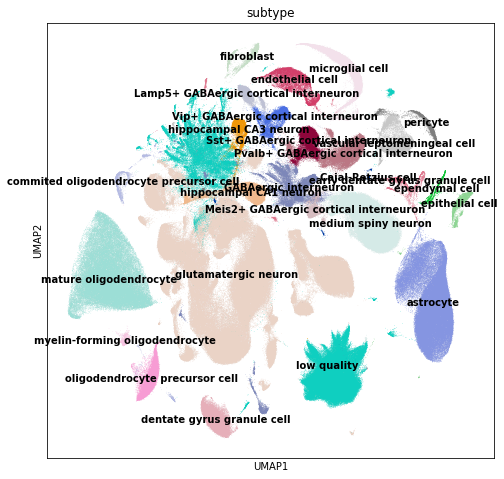

In [13]:
plt.rcParams['figure.figsize'] = (8, 8)

sc.pl.umap(adata, color=['general_celltype'], size=1, legend_loc = 'on data')
sc.pl.umap(adata, color=['celltype'], size=1, legend_loc = 'on data')
sc.pl.umap(adata, color=['subtype'], size=1, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


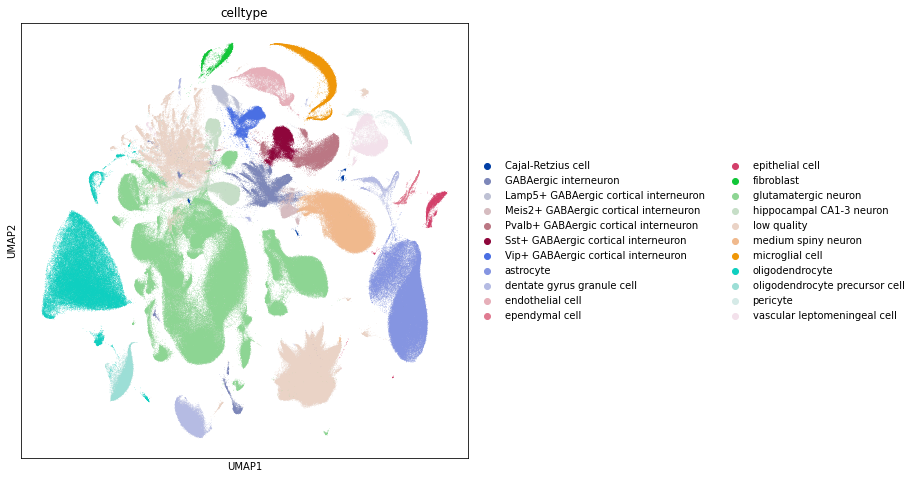

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


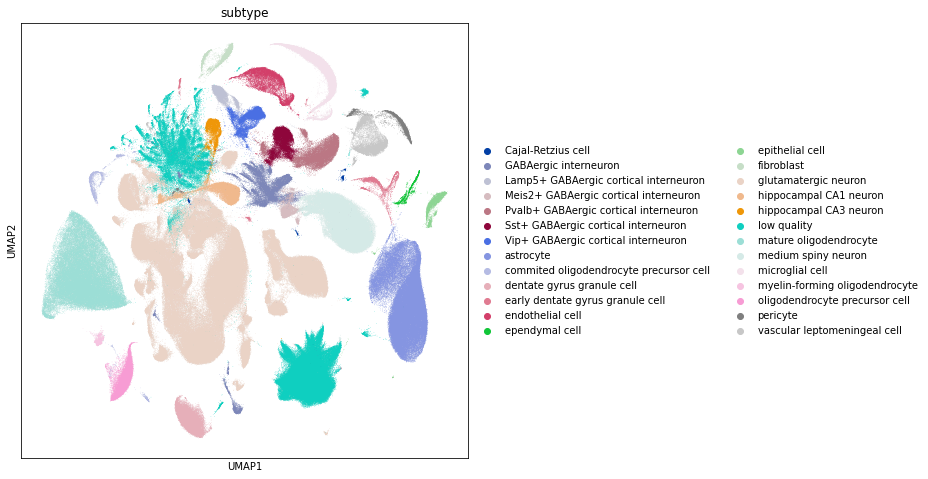

In [14]:
sc.pl.umap(adata, color=['celltype'], size=1)
sc.pl.umap(adata, color=['subtype'], size=1)


categories: Cajal-Retzius cell, GABAergic interneuron, Lamp5+ GABAergic cortical interneuron, etc.
var_group_labels: Endothelial, Pericyte, Fibroblast, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


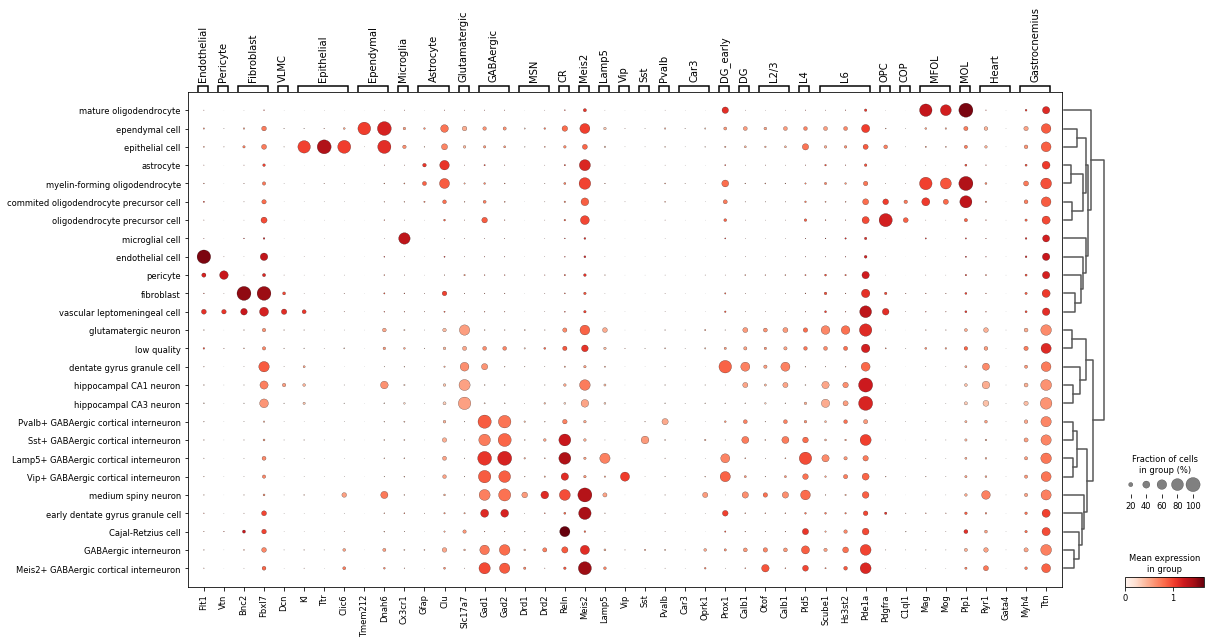

In [16]:
smol_marker_genes_dict = {
    "Endothelial": ["Flt1"],
    "Pericyte": ["Vtn"],
    "Fibroblast": ["Bnc2","Fbxl7"],
    "VLMC": ["Dcn"],
    "Epithelial":["Kl","Ttr","Clic6"],
    "Ependymal":["Tmem212","Dnah6"],
    "Microglia": ["Cx3cr1"],
    "Astrocyte": ["Gfap","Clu"],
    "Glutamatergic": ["Slc17a7"],
    "GABAergic": ["Gad1","Gad2",],
    "MSN": ["Drd1","Drd2",],
    "CR": ["Reln"],
    "Meis2": ["Meis2"],
    "Lamp5": ["Lamp5"],
    "Vip": ["Vip"],
    "Sst": ["Sst"],
    "Pvalb": ["Pvalb"],
    "Car3": ["Car3","Oprk1"],
    "DG_early": ["Prox1"],
    "DG": ["Calb1"],
    "L2/3": ['Otof','Calb1'],
    "L4": ["Pld5"],
    "L6": ["Scube1","Hs3st2","Pde1a"],
    "OPC": ["Pdgfra"],
    "COP": ["C1ql1"],
    "MFOL": ["Mag","Mog"],
    "MOL": ["Plp1"],
    "Heart": ["Ryr1","Gata4"],
    "Gastrocnemius": ["Myh4","Ttn"]
}


adata.var_names  = adata.var['gene_name']

sc.pl.dotplot(adata, smol_marker_genes_dict, 'subtype', mean_only_expressed = True,
              dendrogram=True, log=True)


# Save annotated adata

In [18]:
adata.write_h5ad('../IGVF_analysis/annotated_tissues/CortexHippocampus_annotated.h5ad')


In [17]:
meta = adata.obs
meta.to_csv(f"../IGVF_analysis/annotated_tissues/CortexHippocampus_annotated_metadata.csv")

# Pseudobulk PCA

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import decoupler as dc
import anndata
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
tissue = "CortexHippocampus"

In [2]:
adata = sc.read(f"../IGVF_analysis/annotated_tissues/{tissue}_annotated.h5ad")
adata = adata[~adata.obs['celltype'].isin(["low quality"])]
adata = adata[(adata.obs['Genotype'] != "tie")]


In [3]:
adata.obs['Mouse_Tissue_ID'] = adata.obs['Mouse_Tissue_ID'].astype(str)


/tmp/ipykernel_3422371/2200752215.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Mouse_Tissue_ID'] = adata.obs['Mouse_Tissue_ID'].astype(str)


In [5]:
# adjust mouse_tissue_id
ms1 = ['B6J','AJ','WSBJ','129S1J']
ms2 = ['NODJ','PWKJ','NZOJ','CASTJ']

# Define a function to update 'Mouse_Tissue_ID' based on conditions
def update_mouse_tissue_id(row):
    if row['plate'] != 'igvf_012' and row['Column'] in [9, 10, 11, 12]:
        if row['Genotype'] in ms1:
            return row['Multiplexed_sample1']
        elif row['Genotype'] in ms2:
            return row['Multiplexed_sample2']
    return row['Mouse_Tissue_ID']

meta = adata.obs

# Apply the function to update the 'Mouse_Tissue_ID' column
meta['Mouse_Tissue_ID'] = meta.apply(update_mouse_tissue_id, axis=1)
adata.obs['Mouse_Tissue_ID'] = meta['Mouse_Tissue_ID']


In [18]:
import decoupler as dc

pdata = dc.get_pseudobulk(
    adata,
    sample_col='Mouse_Tissue_ID',
    groups_col=None,
    obs=adata.obs,
    layer='raw_counts',
    mode='sum',
    min_cells=10,
    min_counts=10000
)



In [19]:
for c in pdata.obs.columns:
        if pd.api.types.is_object_dtype(pdata.obs[c].dtype):
            pdata.obs[c] = pdata.obs[c].fillna('NA')

In [20]:
pdata

AnnData object with n_obs × n_vars = 65 × 49172
    obs: 'Mouse_Tissue_ID', 'Protocol', 'Chemistry', 'Genotype', 'Notes', 'SampleType', 'Tissue', 'Tissue_ID', 'Tissue1_ontology_id', 'Tissue2_ontology_id', 'Sex', 'Replicate', 'Age_weeks', 'psbulk_n_cells', 'psbulk_counts'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    layers: 'psbulk_props'

In [21]:
pdata.write_h5ad(f'../IGVF_analysis/pseudobulk/{tissue}_pseudobulk_raw.h5ad')

In [4]:
pdata = sc.read(f'../IGVF_analysis/pseudobulk/{tissue}_pseudobulk_raw.h5ad')

In [5]:
sc.pp.normalize_total(pdata, target_sum=1e4) # Counts per 10k
sc.pp.log1p(pdata)

sc.tl.pca(pdata, svd_solver='arpack', use_highly_variable = False)



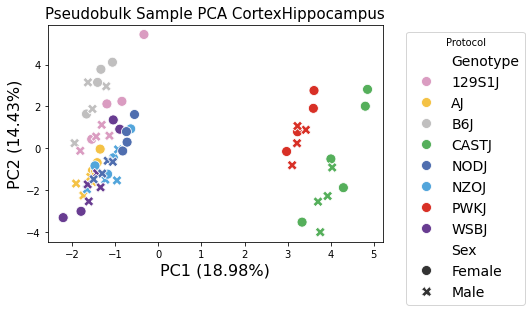

In [6]:
df = pd.DataFrame(pdata.obsm["X_pca"])
meta  = pdata.obs
df.set_index(meta['Mouse_Tissue_ID'], inplace=True)
merged_df = pd.merge(df, meta, left_index=True, right_on='Mouse_Tissue_ID')


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


sns.scatterplot(x=merged_df.iloc[:, 0], y=merged_df.iloc[:, 1], 
                hue=merged_df['Genotype'], 
                style=merged_df['Sex'], 
                s=100, 
                palette=geno_palette,
                alpha=1)  # Adjust transparency if needed

plt.xlabel("PC1", fontsize=16)
plt.ylabel("PC2", fontsize=16)
plt.title(f'Pseudobulk Sample PCA {tissue}', fontsize=15)

plt.legend(title='Protocol', fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
pc1 = pdata.uns["pca"]["variance_ratio"][0]
pc2 = pdata.uns["pca"]["variance_ratio"][1]
plt.xlabel(f"PC1 ({pc1:.2%})", fontsize=16)
plt.ylabel(f"PC2 ({pc2:.2%})", fontsize=16)


plt.show()
